In [1]:
from cesium import datasets
eeg = datasets.fetch_andrzejak()

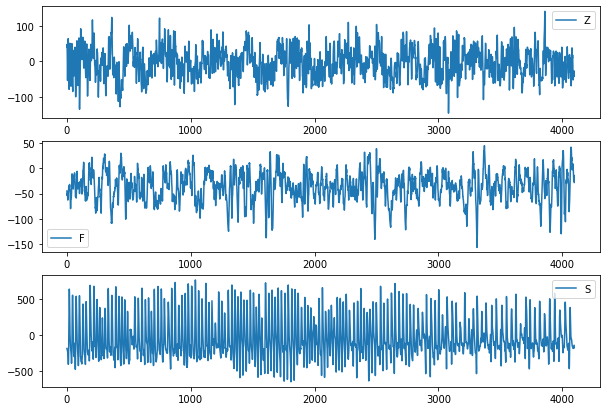

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))

plt.subplot(3, 1, 1)
plt.plot(eeg["measurements"][0])
plt.legend(eeg['classes'][0])
plt.subplot(3, 1, 2)
plt.plot(eeg["measurements"][300])
plt.legend(eeg['classes'][300])
plt.subplot(3, 1, 3)
plt.plot(eeg["measurements"][450])
plt.legend(eeg['classes'][450])

In [3]:
from cesium.featurize import featurize_time_series as ft
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "percent_close_to_median",
                   "skew",
                   "max_slope"]

fset_cesium = ft(times = eeg["times"],
                 values = eeg["measurements"],
                 errors = None,
                 features_to_use = features_to_use,
                 scheduler = None)

In [4]:
#what does the data look like?
fset_cesium.head()

feature,amplitude,percent_beyond_1_std,percent_close_to_median,skew,max_slope
channel,0,0,0,0,0
0,143.5,0.327313,0.505004,0.032805,11107.796610
1,211.5,0.290212,0.640469,-0.092715,20653.559322
2,165.0,0.302660,0.515987,-0.004100,13537.627119
3,171.5,0.300952,0.541128,0.063678,17008.813559
4,170.0,0.305101,0.566268,0.142753,13016.949153


In [ ]:
import numpy as np
np.std(eeg["measurements"][0])
np.mean(eeg['measurements'][0])

#### RF sklearn code sample

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fset_cesium.values, eeg["classes"], random_state=21)

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10,
                                max_depth = 3,
                                random_state = 21)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=21)

In [6]:
rf_clf.score(X_test, y_test)

0.616

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from math import sqrt

from datetime import datetime
import pandas as pd
import numpy as np
import pdb

In [7]:
words = pd.read_csv('worddata.csv',header = None)
words.head()

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,4,-0.89094,-0.86099,-0.82438,-0.78214,-0.73573,-0.68691,-0.63754,-0.589370,-0.543420,...,-0.86309,-0.86791,-0.87271,-0.87846,-0.88592,-0.89619,-0.90783,-0.91942,-0.93018,-0.93939
1,12,-0.78346,-0.68562,-0.58409,-0.47946,-0.37398,-0.27008,-0.17225,-0.087463,-0.019191,...,-0.88318,-0.89189,-0.90290,-0.91427,-0.92668,-0.93966,-0.95244,-0.96623,-0.98050,-0.99178
2,13,-1.32560,-1.28430,-1.21970,-1.15670,-1.09980,-1.04960,-1.01550,-0.996720,-0.985040,...,-0.83499,-0.86204,-0.88559,-0.90454,-0.93353,-0.99135,-1.06910,-1.13680,-1.19800,-1.27000
3,23,-1.09370,-1.04200,-0.99840,-0.95997,-0.93997,-0.93764,-0.92649,-0.857090,-0.693320,...,-0.72810,-0.74512,-0.76376,-0.78068,-0.80593,-0.84350,-0.89531,-0.96052,-1.05090,-1.12830
4,4,-0.90138,-0.85228,-0.80196,-0.74932,-0.69298,-0.63316,-0.57038,-0.506920,-0.446040,...,-0.95452,-0.97322,-0.98984,-1.00520,-1.01880,-1.02960,-1.03700,-1.04110,-1.04180,-1.04030


Text(0.5, 0.8, 'Histogram of Projection Word 3')

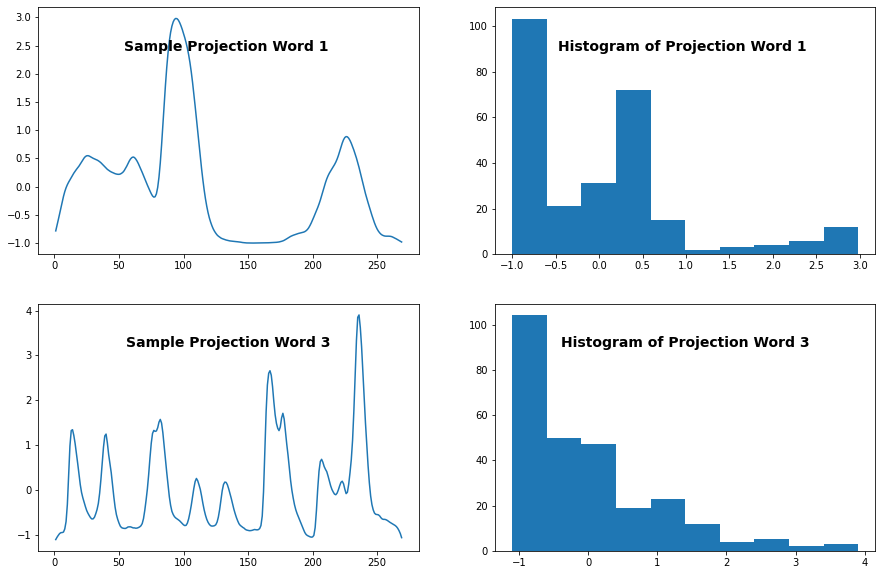

In [12]:
# excercise
plt.subplot(2, 2, 1)
plt.plot(words.iloc[1, 1:-1])
plt.title("Sample Projection Word 1 ", fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(2, 2, 2)
plt.hist(words.iloc[1, 1:-1], 10)
plt.title("Histogram of Projection Word 1 ", fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(2, 2, 3)
plt.plot(words.iloc[3, 1:-1])
plt.title("Sample Projection Word 3", fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(2, 2, 4)
plt.hist(words.iloc[3, 1:-1], 10)
plt.title("Histogram of Projection Word 3", fontweight = 'bold', y = 0.8, fontsize = 14)


In [ ]:
words.shape

In [26]:
words_features = words.iloc[:, 1:271]

In [27]:
# creating a time series with a given data
times  = []
values = []
for idx, row in words_features.iterrows():
    values.append(row.values)
    times.append(np.array([i for i in range(row.values.shape[0])]))

In [28]:
from cesium import featurize
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "percent_close_to_median",
                   ]
featurized_words = featurize.featurize_time_series(times=times,
                                              values=values,
                                              errors=None,
                                              features_to_use=features_to_use,
                                              scheduler = None)
featurized_words.to_csv('./featurized_words.csv')

In [29]:
featurized_words = pd.read_csv("./featurized_words.csv", header =  [0, 1])
featurized_words.columns = featurized_words.columns.droplevel(-1)
featurized_words.head()

,feature,amplitude,percent_beyond_1_std,percent_close_to_median
0,0,1.674555,0.188889,0.451852
1,1,1.990520,0.118519,0.259259
2,2,2.903650,0.114815,0.637037
3,3,2.515050,0.211111,0.562963
4,4,1.966150,0.181481,0.533333


(array([ 48., 146., 100.,  45.,  41.,  29.,  23.,  12.,   8.,   3.]),
 array([0.05925926, 0.10666667, 0.15407407, 0.20148148, 0.24888889,
        0.2962963 , 0.3437037 , 0.39111111, 0.43851852, 0.48592593,
        0.53333333]),
 <BarContainer object of 10 artists>)

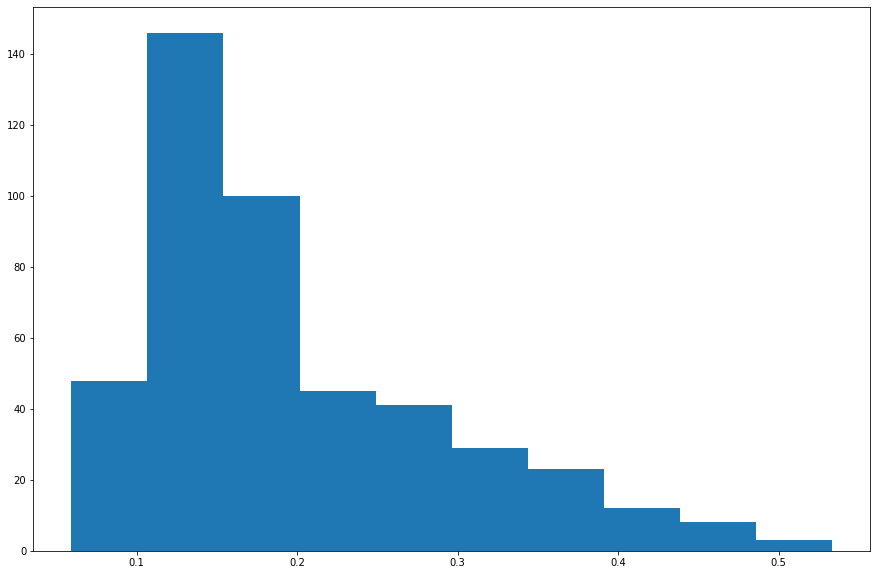

In [30]:
plt.hist(featurized_words.percent_beyond_1_std)